In [19]:
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import MCMT

from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

import numpy as np
import matplotlib.pyplot as plt
import math

sim = Aer.get_backend('aer_simulator')

# using tikzplotlib to export plot to latex
import tikzplotlib

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='10cm', height='10cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

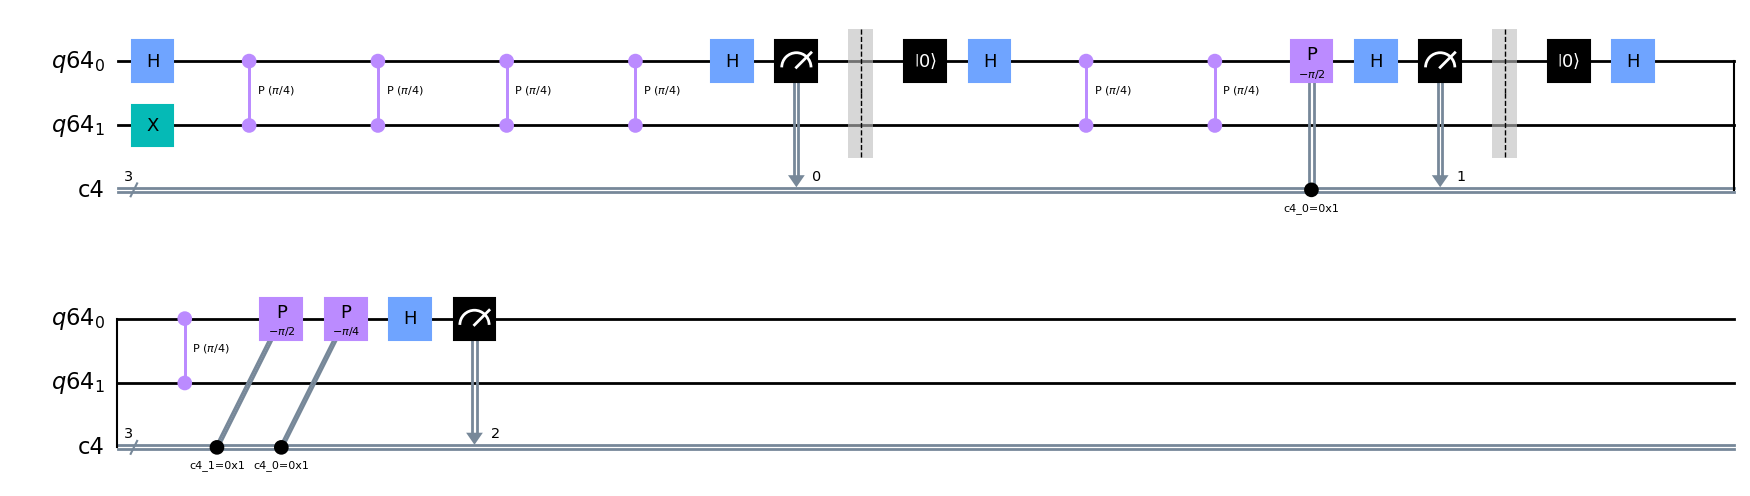

In [20]:
##### your code goes here ######
q = QuantumRegister(2)
c = ClassicalRegister(3)

qc_T = QuantumCircuit(q,c)

# First step
##1 Initialization
qc_T.h(q[0])
qc_T.x(q[1])
##2 Apply control-U operator as many times as needed to get the least significant phase bit
qc_T.cp(np.pi/4, q[1], q[0])
qc_T.cp(np.pi/4, q[1], q[0])
qc_T.cp(np.pi/4, q[1], q[0])
qc_T.cp(np.pi/4, q[1], q[0])
##3 measure the anscillar qubit in x-basis
qc_T.h(q[0])
qc_T.measure(q[0], c[0])

# Second step
qc_T.barrier()
qc_T.reset(q[0])
##1 Initialization
qc_T.h(q[0])
##2 Apply control-U operator as many times as needed 
qc_T.cp(np.pi/4, q[1], q[0])
qc_T.cp(np.pi/4, q[1], q[0])
##3 phase correction
qc_T.p(-np.pi/2, q[0]).c_if(c[0], 1)
##4 measure the anscillar qubit in x-basis
qc_T.h(q[0])
qc_T.measure(q[0], c[1])

# Third step
qc_T.barrier()
qc_T.reset(q[0])
##1 Initialization
qc_T.h(q[0])
##2 Apply control-U operator as many times as needed to get the least significant phase bit
qc_T.cp(np.pi/4, q[1], q[0])
##3 phase correction
qc_T.p(-np.pi/2, q[0]).c_if(c[1], 1)
qc_T.p(-np.pi/4, q[0]).c_if(c[0], 1)
##4 measure the anscillar qubit in x-basis
qc_T.h(q[0])
qc_T.measure(q[0], c[2])

################
qc_T.draw(output='mpl')

In [21]:
print(qc_T.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q64}_{0} :  } & \lstick{{q64}_{0} :  } & \gate{\mathrm{H}} & \control \qw & \dstick{\hspace{2.0em}\mathrm{P}\,(\mathrm{\frac{\pi}{4}})} \qw & \qw & \qw & \control \qw & \dstick{\hspace{2.0em}\mathrm{P}\,(\mathrm{\frac{\pi}{4}})} \qw & \qw & \qw & \control \qw & \dstick{\hspace{2.0em}\mathrm{P}\,(\mathrm{\frac{\pi}{4}})} \qw & \qw & \qw & \control \qw & \dstick{\hspace{2.0em}\mathrm{P}\,(\mathrm{\frac{\pi}{4}})} \qw & \qw & \qw & \gate{\mathrm{H}} & \meter \barrier[0em]{1} & \qw & \gate{\mathrm{\left|0\right\rangle}} & \gate{\mathrm{H}} & \control \qw & \dstick{\hspace{2.0em}\mathrm{P}\,(\mathrm{\frac{\pi}{4}})} \qw & \qw & \qw & \control \qw & \dstick{\hspace{2.0em}\mathrm{P}\,(\mathrm{\frac{\pi}{4}})} \qw & \qw & \qw & \gate{\mathrm{P}\,(\mathrm{\frac{-\pi}{2}})} & \gate{\mathrm{H}} & \meter \barrier[0em]{1} 

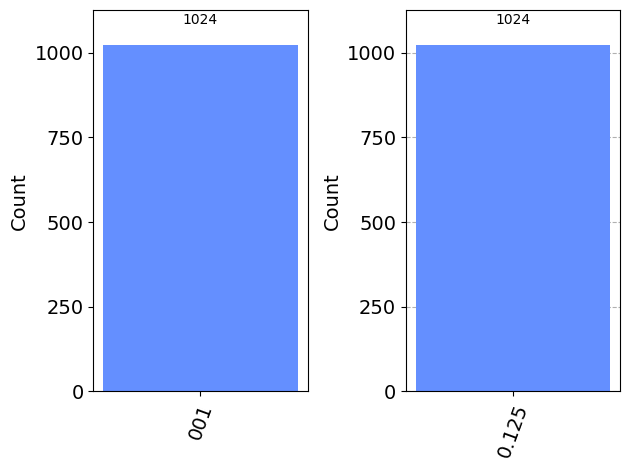

In [22]:
count0 = execute(qc_T, sim).result().get_counts()
n=3
key_new = [str(int(key,2)/2**n) for key in list(count0.keys())]
count1 = dict(zip(key_new, count0.values()))

fig, ax = plt.subplots(1,2)
plot_histogram(count0, ax=ax[0])
plot_histogram(count1, ax=ax[1])
plt.tight_layout()

save_fig('ipe')

In [23]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
from qiskit.providers.fake_provider import FakeMelbourne
backend = FakeMelbourne()
shots=1024

C:\Users\romai\AppData\Roaming\Python\Python310\site-packages\tikzplotlib\_cleanfigure.py:200: UserWarning: Cleaning Bar Container (bar plot) is not supported yet.
  warnings.warn("Cleaning Bar Container (bar plot) is not supported yet.")


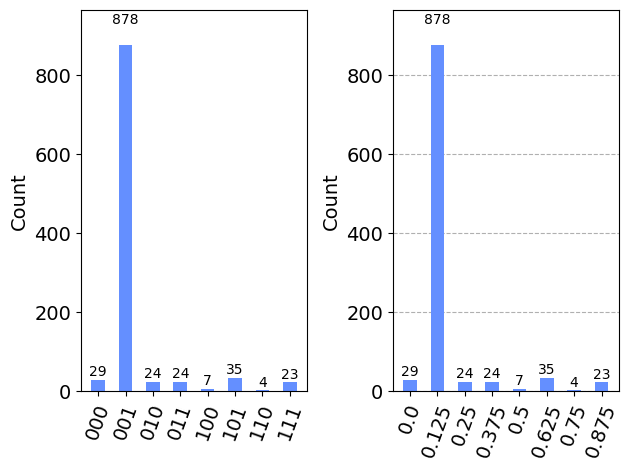

In [24]:
count0 = execute(qc_T, backend).result().get_counts()
n=3
key_new = [str(int(key,2)/2**n) for key in list(count0.keys())]
count1 = dict(zip(key_new, count0.values()))

fig, ax = plt.subplots(1,2)
plot_histogram(count0, ax=ax[0])
plot_histogram(count1, ax=ax[1])
plt.tight_layout()

save_fig('ipe_real')